# Aim & Objectives

The aim of the project is to analyse and understand the factors influencing tipping decision in restaurants. By examining variables such as total bill amount, party size, customer demographics, and smoking status, the project seeks to identify patterns and insights into customer tipping behaviours, which can aid restaurants in improving customer experience and staff interactions.

•	Finding how the total bill amount affects the absolute and percentage tip given by customers, and whether tipping patterns changes as bill size increases.

•	Examine the Influence of Party Size on Tipping Behaviour.

•	Study how variables like gender, smoker status, and other demographic factors correlate with tipping behaviours to uncover any observable trends.


- `total_bill:` This attribute represents the total bill (including tip) for a meal, recorded in dollars
- `tip:` The amount of tip given for the meal, recorded in dollars
- `sex:` The gender of the person who paid the bill, recorded as 'Male' or 'Female'.
- `smoker:` Indicates whether the party included smokers or non-smokers. It is recorded as 'Yes' or 'No'
- `day:` The day of the week on which the meal was taken, recorded as 'Thur' for Thursday, 'Fri' for Friday, 'Sat' for Saturday, or 'Sun' for Sunday.
- `time:` Indicates whether the meal was served during lunch or dinner, recorded as 'Lunch' or 'Dinner'
- `size:` The number of people in the party.


### Import Libraries  

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

### Load & Read Dataset into DataFrame

In [28]:
df = pd.read_csv(r"D:\tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Data Preprocessing

In [12]:
 # skim combination the functionalities of info() and describe()
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 244    │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ total_bill          │     0 │        0 │      20 │     8.9 │    3.1 │     13 │     24 │      51 │  ▂█▄▂▁▁  │  │
│ │ tip                 │     0 │        0 │       3 │     1.4 │      1 │      2 │    3.6 │      10 │   ██▃▁   │  │
│ │ size                │     0 │        0 │     2.6 │    0.95 │      1 │      2 │      3 │       6 │    █▂▂   │  │
│ └─────────────────────┴───────┴──────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sex                       │       0 │          0 │                            1 │                      240 │  │
│ │ smoker                    │       0 │          0 │                            1 │                      240 │  │
│ │ day                       │       0 │          0 │                            1 │                      240 │  │
│ │ time                      │       0 │          0 │                            1 │                      240 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [4]:
df.duplicated().sum()

1

In [13]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [14]:
df = df.drop_duplicates()

In [15]:
df.reset_index(drop=True, inplace=True)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,29.03,5.92,Male,No,Sat,Dinner,3
239,27.18,2.00,Female,Yes,Sat,Dinner,2
240,22.67,2.00,Male,Yes,Sat,Dinner,2
241,17.82,1.75,Male,No,Sat,Dinner,2


In [16]:
df['sex'].value_counts()

Male      157
Female     86
Name: sex, dtype: int64

In [17]:
## Average tip percentage

df['tip_percentage'] = (df['tip']/df['total_bill'])*100

avg_tip_percentage = df['tip_percentage'].mean()

avg_tip_percentage

16.083120899771604

## Visualization 

### Correlation between total_bill and tip percentage 


This scatter plot displays the relationship between the total bill amount and the tip percentage given. Based on the spread of points, a few insights can be drawn:

1. Weak Negative Correlation: There appears to be a slight negative trend, where the tip percentage tends to decrease as the total bill increases. This indicates that people might tip a lower percentage on larger bills, though this pattern isn’t strongly defined.


2. High Variation in Tip Percentage for Lower Bills: For lower total bills (under $20), tip percentages are more widely dispersed, ranging from around 10% up to 70%. This suggests greater inconsistency in tipping behavior for smaller bills.


3. Consistency at Higher Bills: For higher total bills (over $30), tip percentages seem to stabilize, with most tips clustering around the 10-20% range. This could imply that customers tend to tip within a standard range for higher bills.


4. Outliers: A few points show exceptionally high tip percentages, which could indicate exceptional service, special occasions, or errors in data entry.



In summary, as the total bill increases, tip percentages tend to cluster in the lower range (10-20%), while smaller bills show more variability in tip behavior. This could be a useful insight for restaurants in understanding tipping trends relative to bill sizes.


In [18]:
df['tip_percentage'] = (df['tip']/df['total_bill'])*100

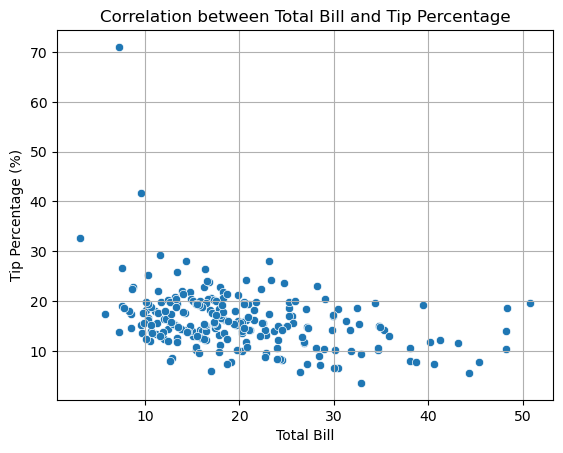

In [19]:
sns.scatterplot(x= 'total_bill', y= 'tip_percentage', data = df)
plt.title('Correlation between Total Bill and Tip Percentage')
plt.xlabel('Total Bill')
plt.ylabel('Tip Percentage (%)')
plt.grid(True)
plt.show()

### Calculating average tip amounts by `day and gender`

This plot suggests that tipping behavior varies by day and gender, with both males and females tipping the most on Sundays and the least on Thursdays. Females, in particular, exhibit a sharper fluctuation in tipping between Sunday and Thursday. These patterns may indicate differences in spending habits, social activities, or dining preferences based on day and gender.

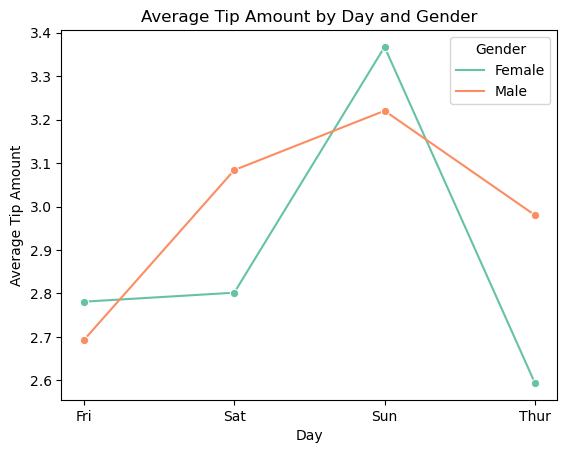

In [20]:
df_line = df.groupby(['day','sex'])['tip'].mean().reset_index()

sns.lineplot(x='day', y='tip', hue='sex', data=df_line, marker='o', palette='Set2')
plt.title("Average Tip Amount by Day and Gender")
plt.xlabel('Day')
plt.ylabel('Average Tip Amount')
plt.legend(title='Gender')
plt.show()

### Affect of time and day of the week on average tip

 Tips are generally higher in the evenings, especially on weekends, likely due to larger bills and a more social dining atmosphere. This suggests focusing promotional efforts during these peak times to maximize revenue, while offering incentives during lower-tip periods like weekday lunches to increase traffic.

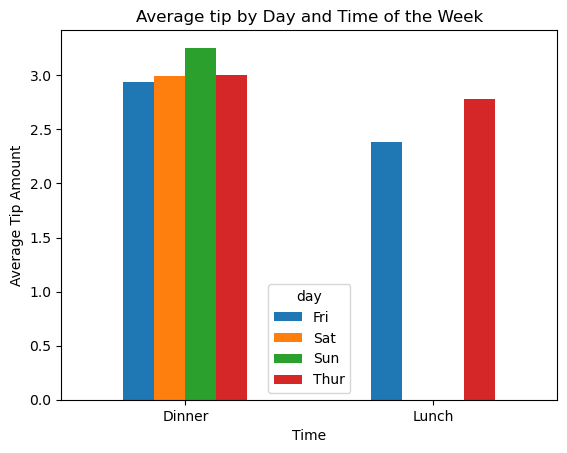

In [21]:
avg_tip = df.groupby(['time','day'])['tip'].mean().unstack()

avg_tip.plot(kind='bar')
plt.title('Average tip by Day and Time of the Week')
plt.xlabel('Time')
plt.ylabel('Average Tip Amount')
plt.xticks(rotation=0)
plt.show()

### Relationship between total_bill and tip, categorized by sex (Female and Male) and whether they are a smoker or non-smoker:

- Positive Correlation Between Total Bill and Tip: In both male and female categories, there is a positive correlation between total_bill and tip, indicating that as the total bill amount increases, the tip amount also tends to increase. This trend is consistent across both smokers and non-smokers.

- Gender Differences: The plot shows that both male and female customers follow a similar tipping trend, but male customers have a slightly wider spread in total_bill values, with some bills exceeding $50. Female customers, on the other hand, tend to have fewer instances of high total bills.

- Smoker vs. Non-Smoker Behavior: Smokers (in orange) and non-smokers (in blue) don’t show significant differences in their tipping behavior for a given total bill. However, there is a slight clustering of smokers at higher total_bill values, especially in the male category, suggesting smokers might be more likely to have higher total bills.

- Range of Tips: Tips for both genders generally fall below $10, with only a few exceptions. There is no clear pattern that indicates smokers tip more or less than non-smokers, as both colors are mixed throughout the range of tip values.

In summary, while both gender and smoker status don’t drastically change tipping habits, male customers have a broader range of total bills. Smokers, especially males, tend to have a few instances of higher bills, though this doesn't seem to affect the tip-to-total-bill relationship.

In [ ]:
"""
Load Data: Reads in tips.csv from the specified location (D:\\tips.csv).
FacetGrid: Creates a grid of scatter plots with separate plots for each category in sex (male and female), highlighting each plot based on whether the person is a smoker or not.
map(): Plots the scatter points on each subplot, using total_bill on the x-axis and tip on the y-axis.
add_legend(): Adds a legend to identify smoker categories.
show(): Displays the plot.
"""

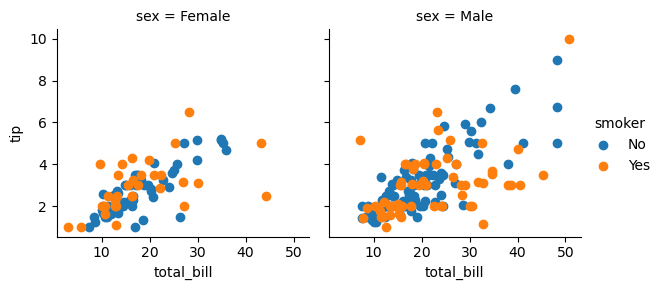

In [22]:
# Plotting the graph
grid = sns.FacetGrid(df, col = 'sex', hue = 'smoker')
grid = grid.map(plt.scatter, 'total_bill',"tip")
grid.add_legend()
plt.show()

### This histogram grid provides insights into the distributions of total_bill, tip, size, and tip_percentage across the dataset:

- Total Bill Distribution: The total_bill distribution is skewed to the right, with most bills falling between $10 and $20, peaking around $15 to $20. There are fewer instances of high bills above $40.

- Tip Distribution: The tip amount is also right-skewed, with most tips concentrated between $2 and $4. Higher tips above $6 are relatively rare.

- Party Size Distribution: The size distribution indicates that most groups are small, with the majority being parties of 2, followed by smaller frequencies for groups of 3, 4, and very few larger groups (up to size 6). This suggests that most dining parties consist of couples or small groups.

- Tip Percentage Distribution: The tip_percentage (calculated as tip / total_bill * 100) shows a peak around 15-20%, with most customers tipping within this range. A few instances have a tip percentage higher than 40%, but these are outliers.

**Summary**
Most customers have small total bills and tip in the range of 15-20%, aligning with standard tipping practices. Additionally, smaller group sizes are common, with parties of 2 being the most frequent. The dataset has a clear tendency towards lower bills and standard tipping, with some outliers in both total bill and tip percentage distributions.

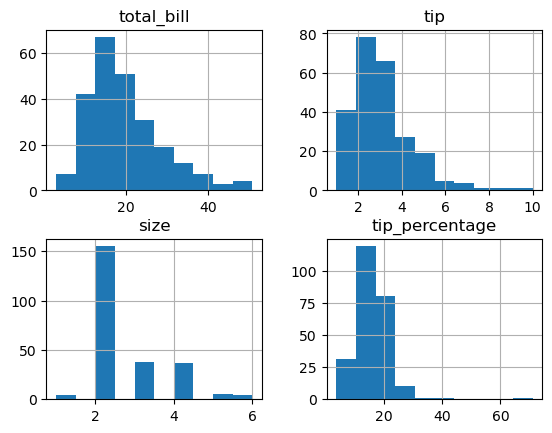

In [23]:
df.hist()
plt.show()

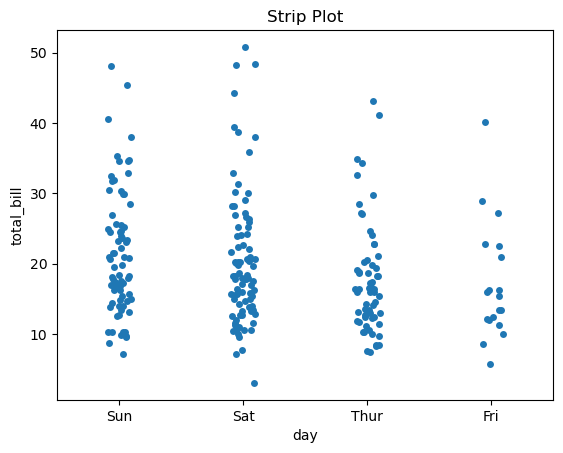

In [40]:
# Plotting the graph
plt.title("Strip Plot")
sns.stripplot(x = 'day', y = 'total_bill', data = df);

### Relationship between tips and total bills for two different dining times

The plot shows the relationship between tips and total bills for two different dining times: Dinner and Lunch. Here are a few insights:

1. Positive Correlation: There is a positive trend in both Dinner and Lunch data, suggesting that as the tip amount increases, the total bill tends to increase as well.


2. Higher Bills for Dinner: Dinner bills generally reach higher totals compared to Lunch, as indicated by the larger spread of Dinner data points along the upper range of total bills.


3. Tip Variability: Tips at Dinner show a wider range, with some high tips even reaching above 10. This might indicate that customers tend to tip more generously during dinner compared to lunch.


4. Data Density: The Lunch data points are more densely clustered at lower bill and tip amounts, while Dinner has a broader spread, indicating more variability in spending and tipping behaviors.



These observations might suggest different customer behaviors or spending capacities between lunch and dinner, with Dinner generally resulting in higher bills and tips.


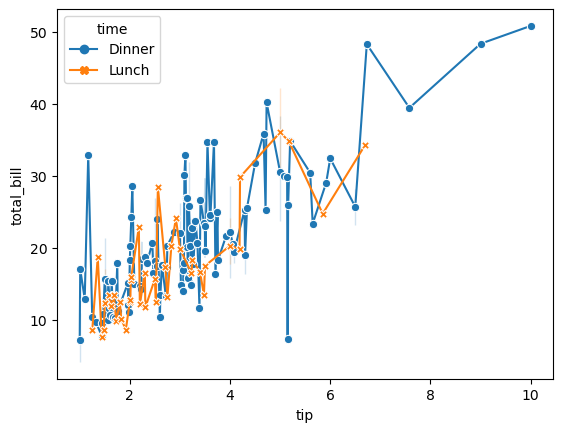

In [24]:
sns.lineplot(x='tip', y='total_bill',
            hue='time', style='time',
            markers=True, dashes=False, data=df);

### Correlation of all numerical columns

- `Higher Bills, Higher Tips:` Generally, there’s a tendency for higher bills to receive larger tips in absolute amounts.
- `Larger Groups, Larger Bills:` Bigger groups tend to accumulate higher total bills.
- `Tip Percentage Decreases with Bill Size:` People are less likely to tip a high percentage on larger bills.
- `Group Size Has Limited Effect on Tip Percentage:` The size of the group doesn’t significantly affect the tip as a percentage of the bill.

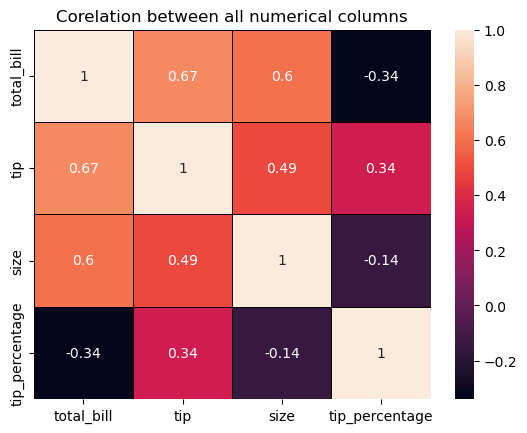

In [25]:
sns.heatmap(df.select_dtypes('number').corr(),annot=True, linewidth=.5, linecolor='black')
plt.title('Corelation between all numerical columns')
plt.show()

### Conclusion 

This study reveals key patterns in how customers tip in restaurants, focusing on factors like bill size, dining time, group size, and customer demographics. We found that as bill amounts increase, tip percentages tend to decrease, although the actual tip amount may still be higher. Evening meals, especially on weekends, generally see larger bills and higher tips, while lunches are often lower in both areas. Additionally, customers tip most generously on Sundays, with tipping behaviour varying slightly by gender.

Party size and smoker status showed limited impact on tipping percentages, though larger groups tended to have higher total bills and absolute tip amounts. These insights can help restaurants better tailor their service, aiming to enhance the dining experience during peak times and possibly using promotions during quieter times like weekday lunches.
In summary, understanding these tipping trends can help restaurants improve customer experience and support fair tipping practices for staff through data-driven approaches.
